In [1]:
import os
from example_agent import graph

2025-03-05 21:24:13,722 - ads4gpts_langgraph_agent.llms - INFO - Creating advertiser agent for provider: openai
2025-03-05 21:24:13,722 - ads4gpts_langgraph_agent.llms - INFO - Creating advertiser agent for provider: openai
2025-03-05 21:24:13,723 - ads4gpts_langgraph_agent.llms - INFO - Creating LLM for provider: openai, model: gpt-4o, temperature: 0.7
2025-03-05 21:24:13,723 - ads4gpts_langgraph_agent.llms - INFO - Creating LLM for provider: openai, model: gpt-4o, temperature: 0.7
2025-03-05 21:24:13,744 - ads4gpts_langgraph_agent.llms - INFO - Creating render agent for provider: openai
2025-03-05 21:24:13,744 - ads4gpts_langgraph_agent.llms - INFO - Creating render agent for provider: openai
2025-03-05 21:24:13,745 - ads4gpts_langgraph_agent.llms - INFO - Creating LLM for provider: openai, model: gpt-4o, temperature: 0.7
2025-03-05 21:24:13,745 - ads4gpts_langgraph_agent.llms - INFO - Creating LLM for provider: openai, model: gpt-4o, temperature: 0.7


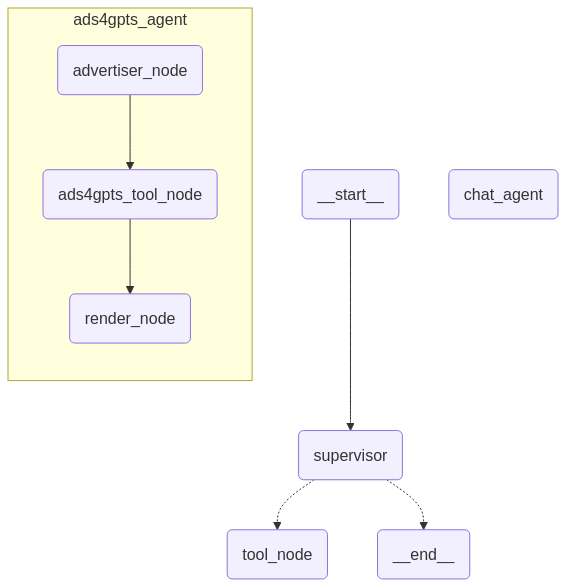

In [3]:
from IPython.display import Image, display

# There is a bug in LangGraph now and render node is not showing
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [2]:
config = {"configurable": {"session_id": "1", "gpt_id": "1", "user_id": "1", "thread_id": "1"}}
inputs = {"messages": [{"role": "user", "content": "hello"}]}
async for update in graph.astream(inputs, config=config, stream_mode="updates", subgraphs=True):
    print(update)

2025-03-05 17:49:54,393 - example_agent - INFO - Supervisor node invoked.


((), {'supervisor': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_XQdWn3uXVGUGBtLbWITySk1J', 'function': {'arguments': '{}', 'name': 'transfer_to_chat_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 164, 'total_tokens': 177, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-f2643f50-6f6d-402e-930b-cae5de915978-0', tool_calls=[{'name': 'transfer_to_chat_agent', 'args': {}, 'id': 'call_XQdWn3uXVGUGBtLbWITySk1J', 'type': 'tool_call'}], usage_metadata={'input_tokens': 164, 'output_tokens': 13, 'total_tokens': 177, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'a

In [3]:
config = {
    "configurable": {"session_id": "1", "gpt_id": "1", "user_id": "1", "thread_id": "1"}
}
inputs = {"messages": [{"role": "user", "content": "Give me an ad about ties."}]}
async for update in graph.astream(
    inputs, config=config, stream_mode="updates", subgraphs=True
):
    print(update)

2025-03-05 17:50:25,828 - example_agent - INFO - Supervisor node invoked.


((), {'supervisor': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ctvgrHCKkJfIP5VXQUskqkqU', 'function': {'arguments': '{}', 'name': 'transfer_to_ads4gpts_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 170, 'total_tokens': 186, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-4e959e08-ae12-4585-a454-d3f538a161f0-0', tool_calls=[{'name': 'transfer_to_ads4gpts_agent', 'args': {}, 'id': 'call_ctvgrHCKkJfIP5VXQUskqkqU', 'type': 'tool_call'}], usage_metadata={'input_tokens': 170, 'output_tokens': 16, 'total_tokens': 186, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_detai

In [5]:
import asyncio
import time
import nest_asyncio

# Apply nest_asyncio to allow running asyncio in a Jupyter notebook
nest_asyncio.apply()

# Define the configuration and input
config = {
    "configurable": {"session_id": "1", "gpt_id": "1", "user_id": "1", "thread_id": "1"}
}
inputs = {
    "messages": [
        {
            "role": "user",
            "content": "Give me an ad about ties.",
        }
    ]
}


# Use the actual graph.astream function
async def measure_time():
    times = []

    for _ in range(5):
        print("Starting iteration...")
        start_time = time.time()

        async for update in graph.astream(
            inputs, config=config, stream_mode="updates", subgraphs=True
        ):
            print(update)  # Consume the async generator

        end_time = time.time()
        times.append(end_time - start_time)

    avg_time = sum(times) / len(times)
    return (times, avg_time)


# Run the async timing function
execution_time = asyncio.run(measure_time())

print(f"Average execution time over 5 iterations: {execution_time[1]:.6f} seconds")

2025-03-05 21:32:14,566 - example_agent - INFO - Supervisor node invoked.


Starting iteration...
((), {'supervisor': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_mhUZBipO9Sp5TRpQgDQA7lUK', 'function': {'arguments': '{}', 'name': 'transfer_to_ads4gpts_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 170, 'total_tokens': 186, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-5ebc54df-c2a2-4c96-b5d2-f3e5d68f272b-0', tool_calls=[{'name': 'transfer_to_ads4gpts_agent', 'args': {}, 'id': 'call_mhUZBipO9Sp5TRpQgDQA7lUK', 'type': 'tool_call'}], usage_metadata={'input_tokens': 170, 'output_tokens': 16, 'total_tokens': 186, 'input_token_details': {'audio': 0, 'cache_read': 0

2025-03-05 21:32:39,349 - example_agent - INFO - Supervisor node invoked.


(('ads4gpts_agent:a10ad486-408f-6296-5f3c-66ef2dcdd103',), {'render_node': {'messages': [AIMessage(content='<- Sponsored Recommendation ->\n\nEver struggled with finding the perfect knot for your tie? Jonathan Farley has you covered! Dive into a world of style and sophistication with tutorials on over 100 different knots. Elevate your wardrobe game effortlessly. [Subscribe now](https://www.youtube.com/channel/UCx5hk4LN3p02jcUt3j_cexQ)', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 76, 'prompt_tokens': 460, 'total_tokens': 536, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f9f4fb6dbf', 'finish_reason': 'stop', 'logprobs': None}, id='run-cc767528-8ff1-492e-80da-bf464134a803-0', usage_metadata={'input_tokens': 460, 'output_t

2025-03-05 21:32:41,033 - example_agent - INFO - Chat agent node invoked.


((), {'supervisor': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7UOIA9MdISiMNDXuc5M9rzwS', 'function': {'arguments': '{}', 'name': 'transfer_to_ads4gpts_agent'}, 'type': 'function'}, {'id': 'call_G6H3t5GTE4jVHqYxdgixN6hG', 'function': {'arguments': '{}', 'name': 'transfer_to_chat_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 170, 'total_tokens': 217, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-93cd8d7d-2887-4b0e-ae17-219de24b1838-0', tool_calls=[{'name': 'transfer_to_ads4gpts_agent', 'args': {}, 'id': 'call_7UOIA9MdISiMNDXuc5M9rzwS', 'type': 'tool_call'}, {'name': 'transfer_to_cha

2025-03-05 21:32:46,722 - example_agent - INFO - Supervisor node invoked.


(('ads4gpts_agent:ac312810-79d0-1e48-4e0a-d11588346c43',), {'render_node': {'messages': [AIMessage(content='Error retrieving ad.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 499, 'total_tokens': 504, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f9f4fb6dbf', 'finish_reason': 'stop', 'logprobs': None}, id='run-3c84fe53-7766-4e77-9dab-5ea13ab3382a-0', usage_metadata={'input_tokens': 499, 'output_tokens': 5, 'total_tokens': 504, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}})
((), {'ads4gpts_agent': {'messages': [{'role': 'user', 'content': 'Give me an ad about ties.'}, AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7

2025-03-05 21:32:59,265 - example_agent - INFO - Supervisor node invoked.


(('ads4gpts_agent:2c7561b8-1d25-b55a-6343-d80cdaac9621',), {'render_node': {'messages': [AIMessage(content="<- Sponsored Recommendation ->\n\nHey, speaking of ties, have you ever struggled with getting that perfect knot? If you're looking to master the art of tying a tie effortlessly, there's a fantastic resource that can help you out. Why not check out this channel for some straightforward tips and tricks? \n\n[Subscribe now](https://youtube.com/@howtotieatie1370?si=vwXtx2Iqss2qFbj5)", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 454, 'total_tokens': 543, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f9f4fb6dbf', 'finish_reason': 'stop', 'logprobs': None}, id='run-5f8c4d19-818f-4d93-85d3-4d92012ce4e6

2025-03-05 21:33:07,919 - example_agent - INFO - Supervisor node invoked.


(('ads4gpts_agent:532796cd-1e8e-24e7-03d6-ae5972e5629d',), {'render_node': {'messages': [AIMessage(content="<- Sponsored Recommendation ->\n\nLooking to complement your style with the perfect tie? Whether it's for an important meeting or a special event, a well-chosen tie can make all the difference. Bespoke Tailors not only crafts exquisite handmade suits but also offers a unique selection of ties to elevate your ensemble. Discover the art of dressing well with us. \n\n[Explore our collection](https://youtube.com/@bespoketailorsdubai?si=9iH587ujoWKkueFa)", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 100, 'prompt_tokens': 462, 'total_tokens': 562, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f9f4fb6dbf', 'finish_reason'